In [13]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cftime
import pandas as pd

In [2]:
#Load .nc file for IMERG
path = '/Users/emmabenedict/Desktop/CURO 4970R/'
imerg_nc = xr.open_dataset(path + 'IMERG.2001-2020.US.2x2.5.half_hourly.precipitationCal.nc')
#IMERG is observational data

In [3]:
imerg_nc

<xarray.Dataset>
Dimensions:           (lat: 21, lon: 33, nbnd: 2, time: 350640)
Coordinates:
  * lat               (lat) float64 20.0 22.0 24.0 26.0 ... 54.0 56.0 58.0 60.0
  * lon               (lon) float64 220.0 222.5 225.0 ... 295.0 297.5 300.0
  * time              (time) object 2001-01-01 00:00:00 ... 2020-12-31 23:30:00
Dimensions without coordinates: nbnd
Data variables:
    lat_bnds          (lat, nbnd) float64 ...
    lon_bnds          (lon, nbnd) float64 ...
    gw                (lat) float64 ...
    area              (lat, lon) float64 ...
    precipitationCal  (time, lat, lon) float32 ...
Attributes: (12/13)
    FileHeader:                      DOI=10.5067/GPM/IMERG/3B-HH/06;\nDOIauth...
    FileInfo:                        DataFormatVersion=6a;\nTKCodeBuildVersio...
    Grid.GridHeader:                 BinMethod=ARITHMETIC_MEAN;\nRegistration...
    Grid.fullnamepath:               /Grid
    DODS_EXTRA.Unlimited_Dimension:  Grid_time
    history:                         Tue Jul  6 17:34:43 2021: ncrcat permute...
    ...                              ...
    remap_script:                    ncremap
    remap_hostname:                  cori04
    remap_version:                   4.9.7
    nco_openmp_thread_number:        2
    map_file:                        ../maps/map_imerg_0.1x0.1_to_cpc_2x2.5_a...
    input_file:                      permute/3B-HHR.MS.MRG.3IMERG.200101.nc

In [5]:
lat = imerg_nc.lat
lon = imerg_nc.lon
time = imerg_nc.time
precip = imerg_nc.precipitationCal

In [8]:
print(time)

<xarray.DataArray 'time' (time: 350640)>
array([cftime.DatetimeJulian(2001, 1, 1, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(2001, 1, 1, 0, 30, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(2001, 1, 1, 1, 0, 0, 0, has_year_zero=False), ...,
       cftime.DatetimeJulian(2020, 12, 31, 22, 30, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(2020, 12, 31, 23, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(2020, 12, 31, 23, 30, 0, 0, has_year_zero=False)],
      dtype=object)
Coordinates:
  * time     (time) object 2001-01-01 00:00:00 ... 2020-12-31 23:30:00
Attributes:
    DimensionNames:  time
    Units:           seconds since 1970-01-01 00:00:00 UTC
    standard_name:   time
    LongName:        Representative time of data in \n\t\t\tseconds since 197...
    bounds:          time_bnds
    axis:            T
    origname:        time
    fullnamepath:    /Grid/time
    cell_methods:    time: mean


In [9]:
#Pick out one year to plot precipitation data
precip_sel = precip.sel(time=slice("2019-01-01 00:00:00","2019-12-31 23:00:00")).mean(dim="time")*1000*60*60*24

<Figure size 640x480 with 0 Axes>

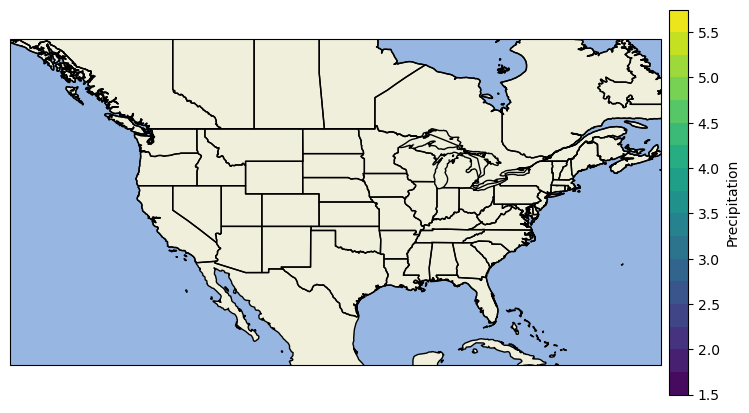

In [15]:
plt.figure()
fig, ax = plt.subplots(figsize=(10, 5), subplot_kw={'projection': ccrs.PlateCarree()})
#ax.set_extent([-86, -81, 30, 36], crs=ccrs.PlateCarree())  # Set map extent

# Add features to the map
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.STATES)
contour = ax.contourf(lon, lat, precip_sel, cmap='viridis', levels = np.arange(1.5,6,0.25),transform=ccrs.PlateCarree())
cbar = plt.colorbar(contour, ax=ax, orientation='vertical', pad=0.01)
cbar.set_label('Precipitation')